In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("UberDataset.csv")

In [4]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df["CATEGORY"].unique()

array(['Business', 'Personal', nan], dtype=object)

In [6]:
df["PURPOSE"].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [7]:
df["PURPOSE"] = df["PURPOSE"].fillna("Missing")

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
list(df["START"].unique())

['Fort Pierce',
 'West Palm Beach',
 'Cary',
 'Jamaica',
 'New York',
 'Elmhurst',
 'Midtown',
 'East Harlem',
 'Flatiron District',
 'Midtown East',
 'Hudson Square',
 'Lower Manhattan',
 "Hell's Kitchen",
 'Downtown',
 'Gulfton',
 'Houston',
 'Eagan Park',
 'Morrisville',
 'Durham',
 'Farmington Woods',
 'Whitebridge',
 'Lake Wellingborough',
 'Fayetteville Street',
 'Raleigh',
 'Hazelwood',
 'Fairmont',
 'Meredith Townes',
 'Apex',
 'Chapel Hill',
 'Northwoods',
 'Edgehill Farms',
 'Tanglewood',
 'Preston',
 'Eastgate',
 'East Elmhurst',
 'Jackson Heights',
 'Long Island City',
 'Katunayaka',
 'Unknown Location',
 'Colombo',
 'Nugegoda',
 'Islamabad',
 'R?walpindi',
 'Noorpur Shahan',
 'Heritage Pines',
 'Westpark Place',
 'Waverly Place',
 'Wayne Ridge',
 'Weston',
 'East Austin',
 'West University',
 'South Congress',
 'The Drag',
 'Congress Ave District',
 'Red River District',
 'Georgian Acres',
 'North Austin',
 'Coxville',
 'Convention Center District',
 'Austin',
 'Katy',
 'S

In [13]:
list(df["STOP"].unique())

['Fort Pierce',
 'West Palm Beach',
 'Palm Beach',
 'Cary',
 'Morrisville',
 'New York',
 'Queens',
 'East Harlem',
 'NoMad',
 'Midtown',
 'Midtown East',
 'Hudson Square',
 'Lower Manhattan',
 "Hell's Kitchen",
 'Queens County',
 'Gulfton',
 'Downtown',
 'Houston',
 'Jamestown Court',
 'Durham',
 'Whitebridge',
 'Lake Wellingborough',
 'Raleigh',
 'Umstead',
 'Hazelwood',
 'Westpark Place',
 'Meredith Townes',
 'Leesville Hollow',
 'Apex',
 'Chapel Hill',
 'Williamsburg Manor',
 'Macgregor Downs',
 'Edgehill Farms',
 'Northwoods',
 'Tanglewood',
 'Preston',
 'Walnut Terrace',
 'Jackson Heights',
 'East Elmhurst',
 'Midtown West',
 'Long Island City',
 'Jamaica',
 'Unknown Location',
 'Colombo',
 'Nugegoda',
 'Katunayaka',
 'Islamabad',
 'R?walpindi',
 'Noorpur Shahan',
 'Heritage Pines',
 'Waverly Place',
 'Wayne Ridge',
 'Depot Historic District',
 'Weston',
 'West University',
 'South Congress',
 'Arts District',
 'Congress Ave District',
 'Red River District',
 'The Drag',
 'Conven

In [14]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [15]:
df["END_DATE"] = pd.to_datetime(df["END_DATE"])

In [16]:
import seaborn as sns

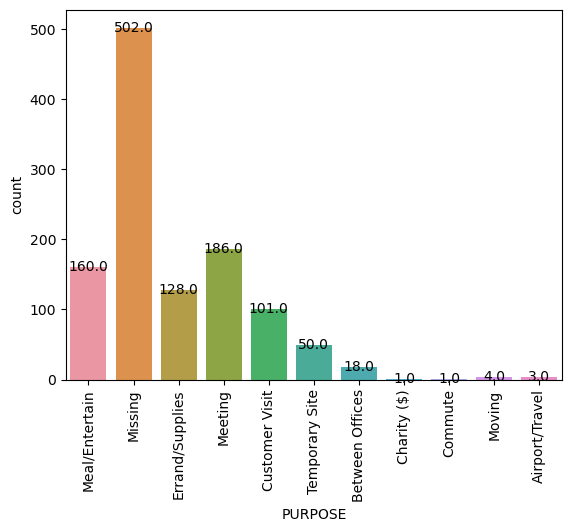

In [17]:

a = sns.countplot(data=df,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 90)
plt.show()


## Looking At overall where Uber was used. What Purpose. Mostly it was used for Meetings, Customer Visit, Meal/Entertain

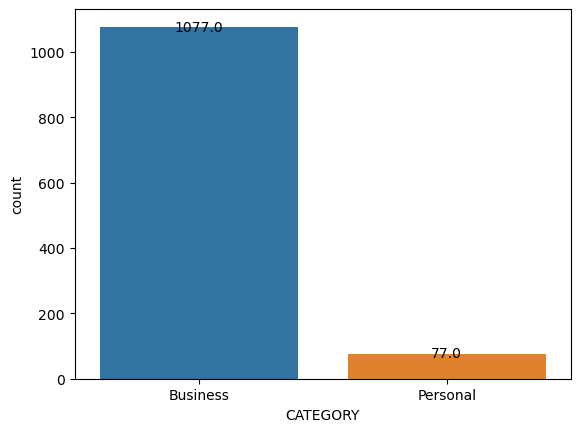

In [18]:

a = sns.countplot(data=df,x="CATEGORY")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## Uber has more Business usecase over Personal

In [19]:
from dateutil.parser import parse

df["START_DATE"] = df["START_DATE"].apply(lambda x: parse(x))

In [20]:
df["day"] = df["START_DATE"].dt.strftime("%A")

In [21]:
df["day"]

0          Friday
1        Saturday
2        Saturday
3         Tuesday
4       Wednesday
          ...    
1150     Saturday
1151     Saturday
1152     Saturday
1153     Saturday
1154     Saturday
Name: day, Length: 1154, dtype: object

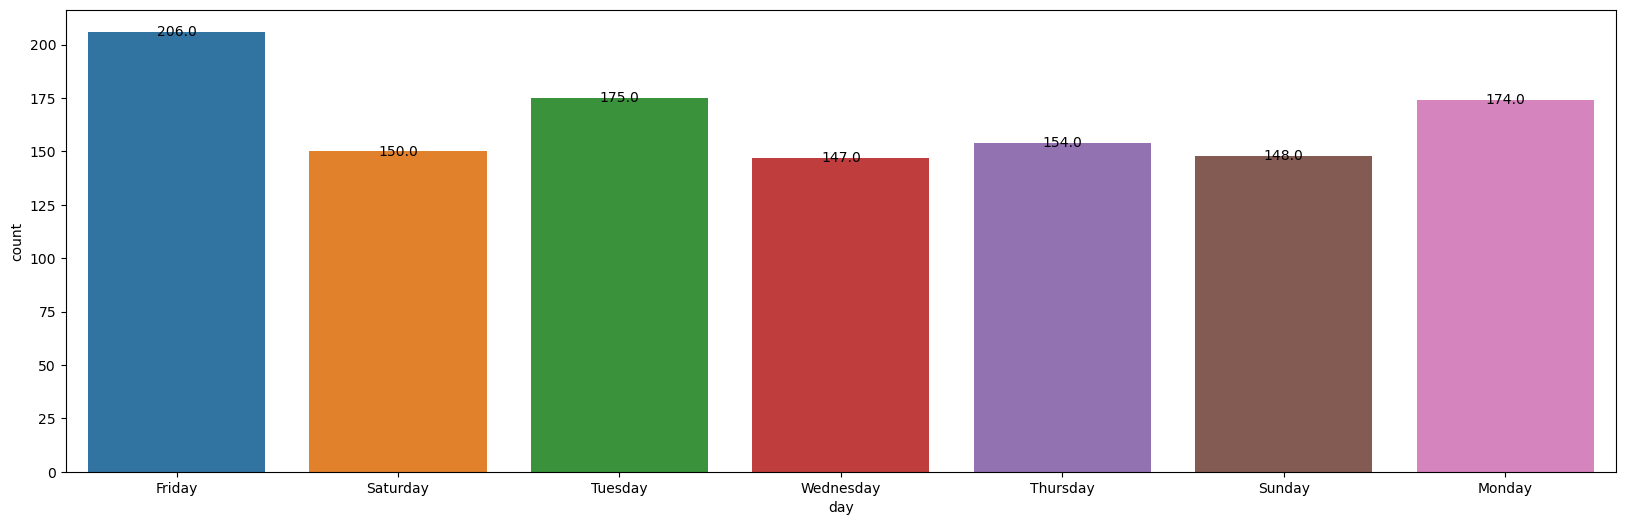

In [22]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=df,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()


## Overall Data on which days uber is used. 

In [23]:
df["MILES"]=df["MILES"].astype(int)

In [24]:
import numpy as np

In [25]:
df["MILES"] = np.abs(df["MILES"])

In [26]:
df["MILES"]

0        5
1        5
2        4
3        4
4       63
        ..
1150     0
1151     3
1152    16
1153     6
1154    48
Name: MILES, Length: 1154, dtype: int64

In [27]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                  int64
PURPOSE               object
day                   object
dtype: object

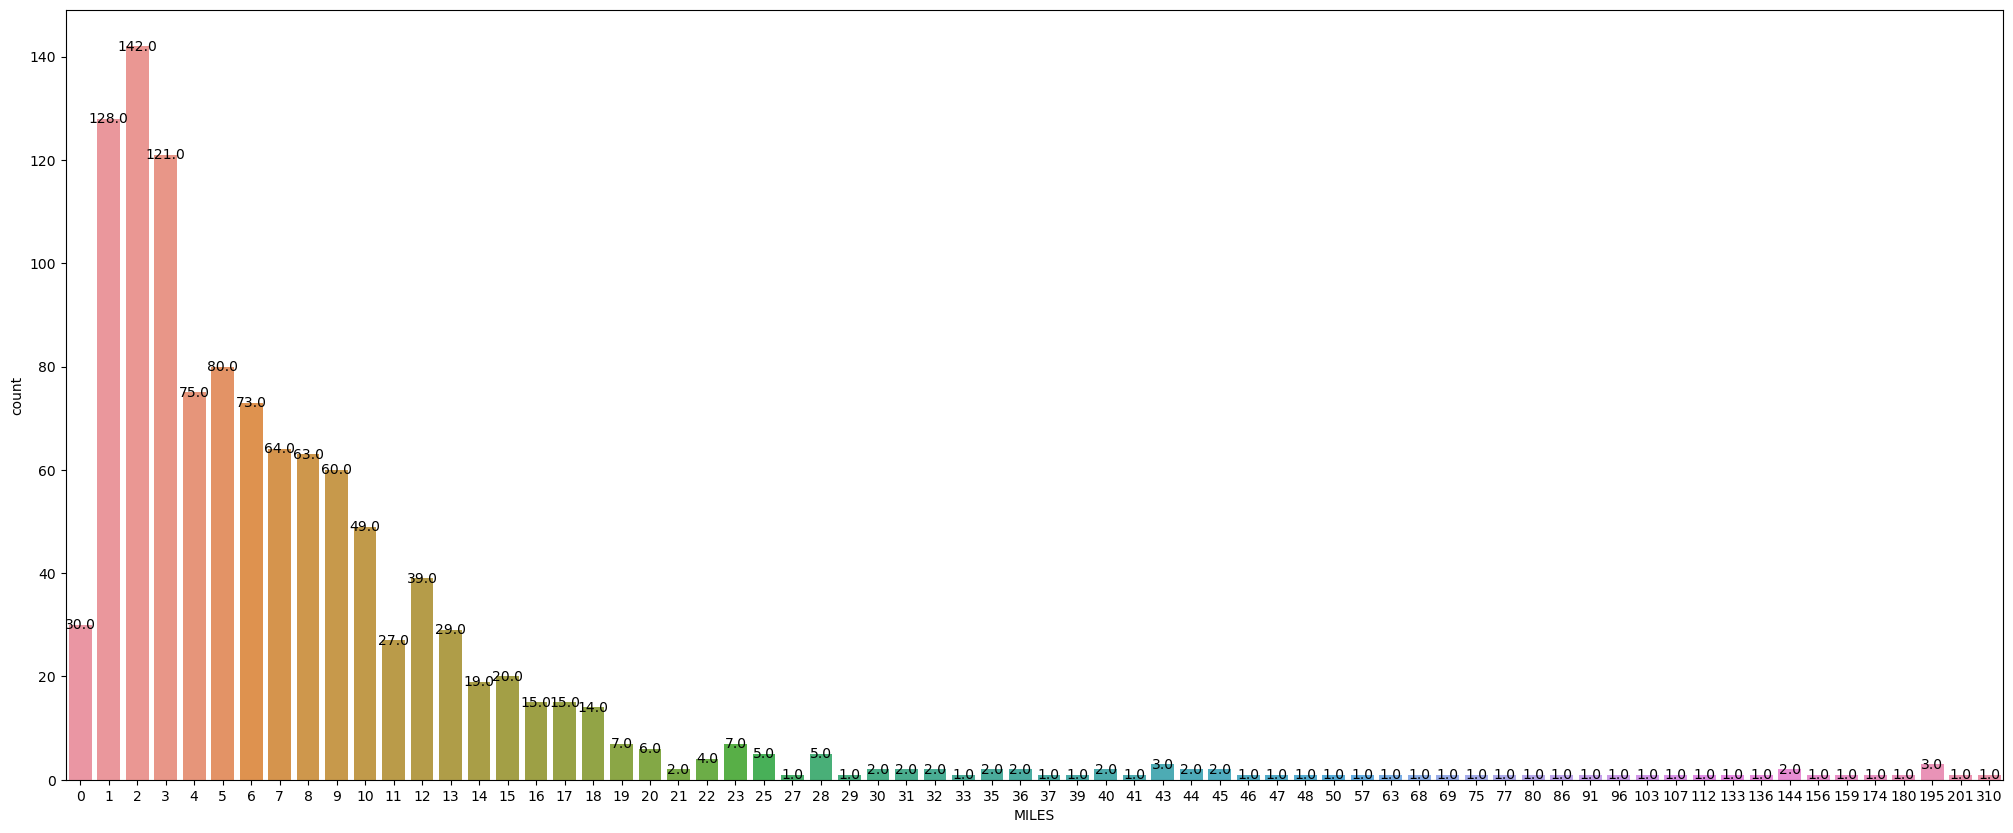

In [28]:
plt.figure(figsize=(25,10))
a = sns.countplot(data=df,x="MILES")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## People are prefering For shorter miles 0-9 miles . Further on people avoid

In [29]:
np.mean(df["MILES"])

10.118717504332755

In [30]:
df["MILES"].skew()

7.217800257847416

## Analyzing the data For Business Usecase

In [31]:
result = df.loc[df["CATEGORY"]=="Business"]

In [32]:
result.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5,Meal/Entertain,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5,Missing,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4,Errand/Supplies,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4,Meeting,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63,Customer Visit,Wednesday


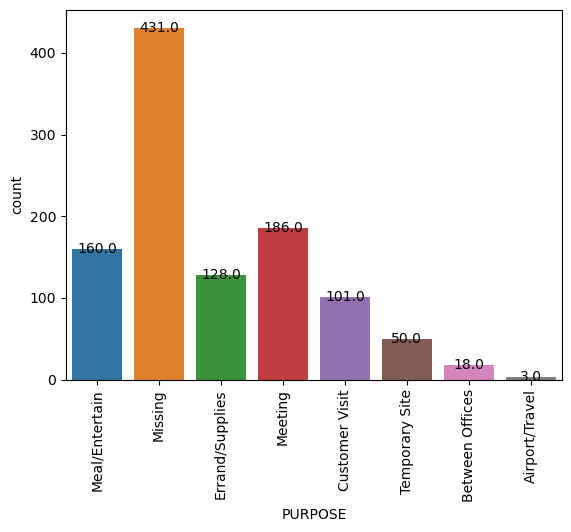

In [33]:
a = sns.countplot(data=result,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 90)
plt.show()


## For Business purpose Uber are used For Meeting, Customer Visit and Meal/Entertaining And Errand/Supplies

<BarContainer object of 1077 artists>

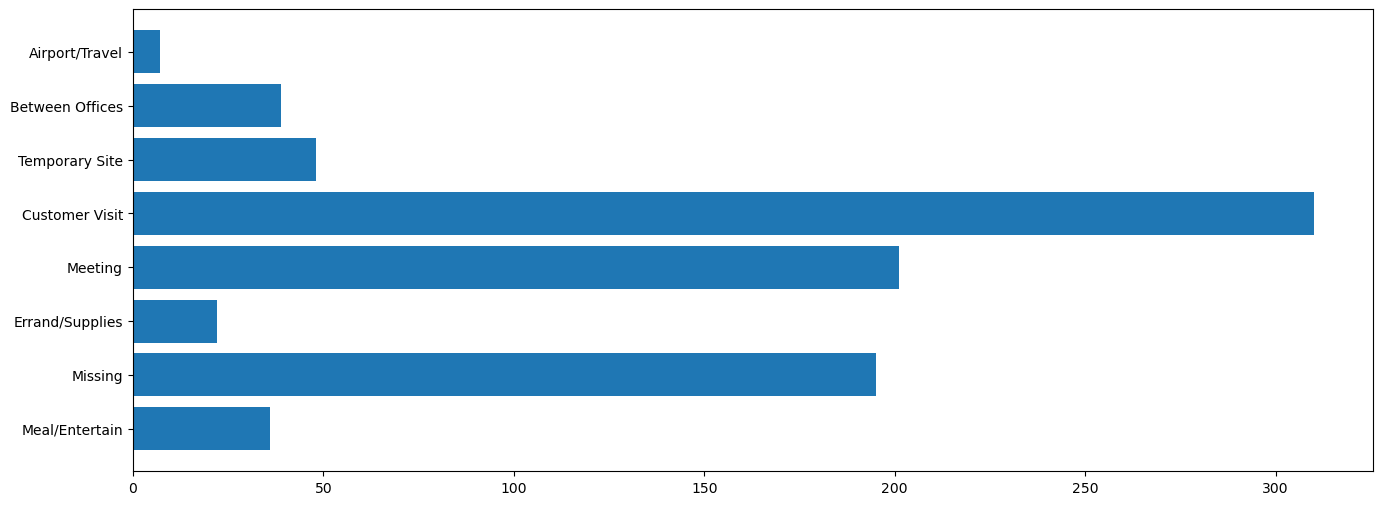

In [34]:
plt.figure(figsize=(16,6))
plt.barh(result["PURPOSE"],result["MILES"])

## For Business purpose Uber are used For Meeting, Customer Visit and Meal/Entertaining And Errand/Supplies. But Mostly Larger Distance is covered for Meeting and Customer Visit

In [35]:
result2 = df.loc[df["PURPOSE"]=="Customer Visit"]

# Customer Visit

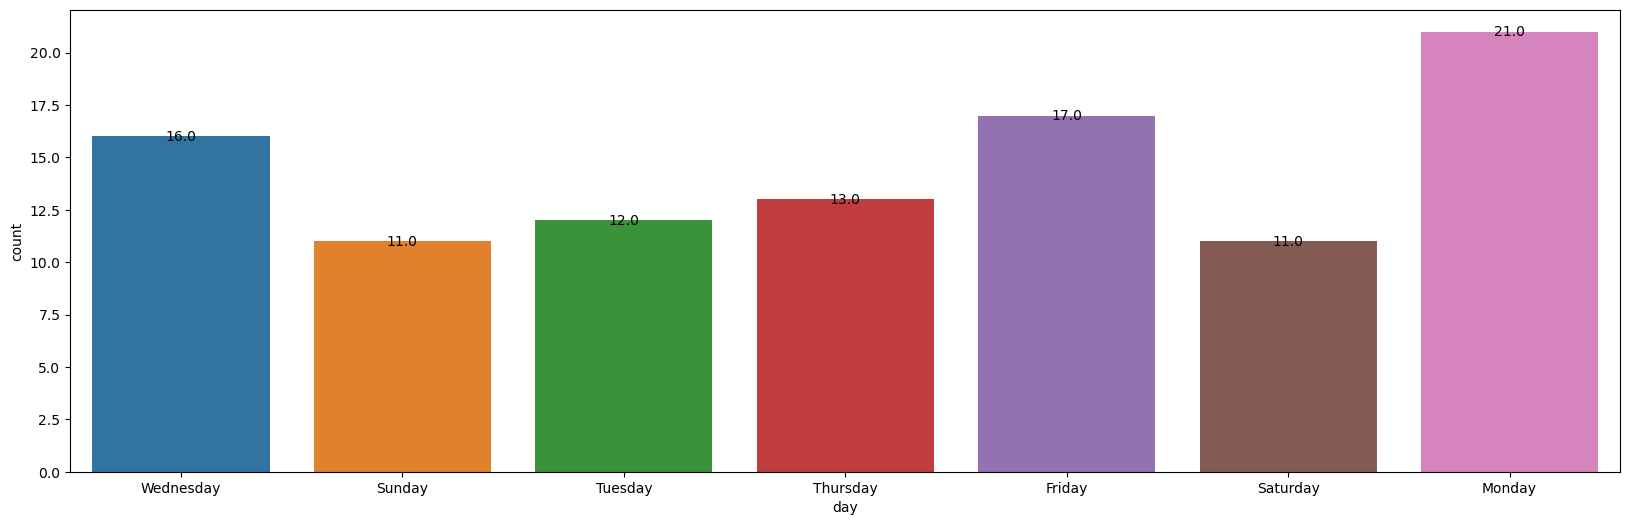

In [36]:
plt.figure(figsize=(20,6))

a = sns.countplot(data=result2,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## For Customer Visit On Monday Uber Was used for meetings most of the days but Was Covering less Miles. On Friday Uber was covering large distance

<BarContainer object of 101 artists>

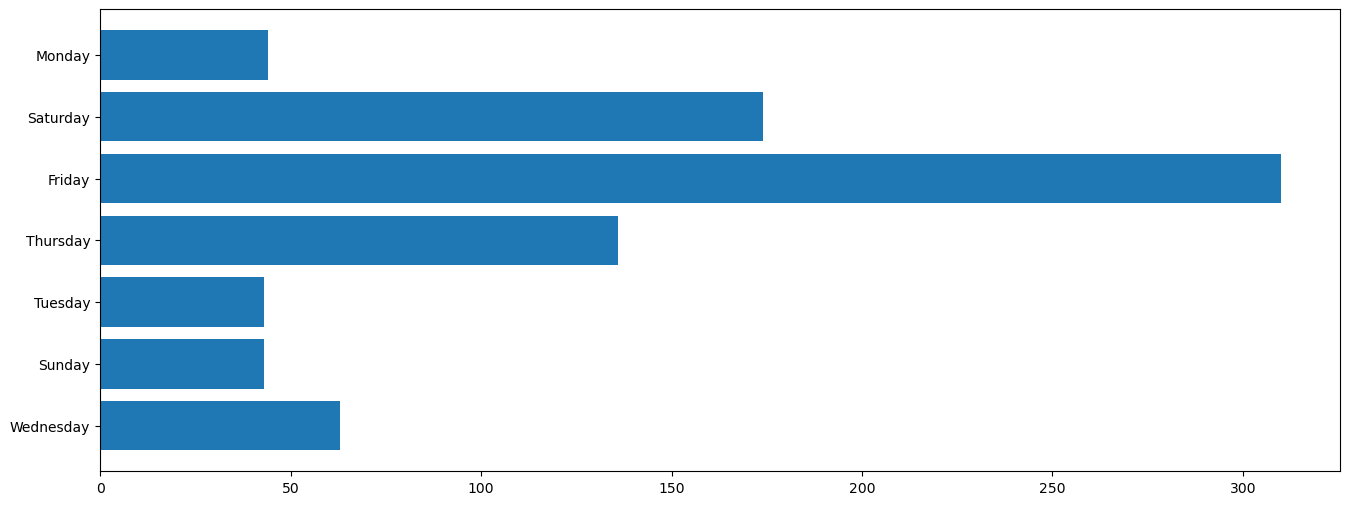

In [37]:
plt.figure(figsize=(16,6))
plt.barh(result2["day"],result2["MILES"])

In [65]:
results1 = result2.loc[result2["day"]=="Friday"]
results2 = result2.loc[result2["day"]=="Saturday"]
results3 = result2.loc[result2["day"]=="Sunday"]

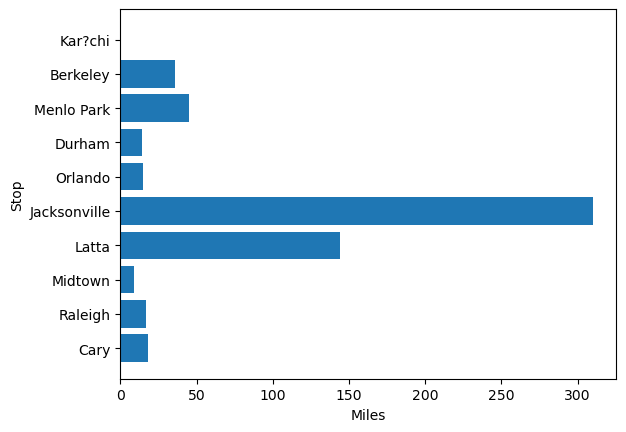

In [66]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results1["STOP"],results1["MILES"])    
plt.show()

In [80]:
results1

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
53,2016-01-29 09:31:00,2016-01-29 09:45:00,Business,Cary,Cary,4,Customer Visit,Friday
97,2016-02-12 11:14:00,2016-02-12 11:35:00,Business,Morrisville,Raleigh,17,Customer Visit,Friday
100,2016-02-12 15:33:00,2016-02-12 16:06:00,Business,Morrisville,Cary,11,Customer Visit,Friday
184,2016-03-04 09:46:00,2016-03-04 10:03:00,Business,Durham,Cary,9,Customer Visit,Friday
187,2016-03-04 13:40:00,2016-03-04 14:09:00,Business,Cary,Raleigh,15,Customer Visit,Friday
242,2016-03-18 21:01:00,2016-03-18 21:15:00,Business,Sharpstown,Midtown,9,Customer Visit,Friday
268,2016-03-25 13:24:00,2016-03-25 16:22:00,Business,Cary,Latta,144,Customer Visit,Friday
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310,Customer Visit,Friday
290,2016-04-01 14:36:00,2016-04-01 15:24:00,Business,Kissimmee,Orlando,15,Customer Visit,Friday
339,2016-04-29 18:46:00,2016-04-29 19:18:00,Business,Cary,Durham,14,Customer Visit,Friday


## Fridays For large distance

## Jacksonvile and Latta 

# On Saturdays

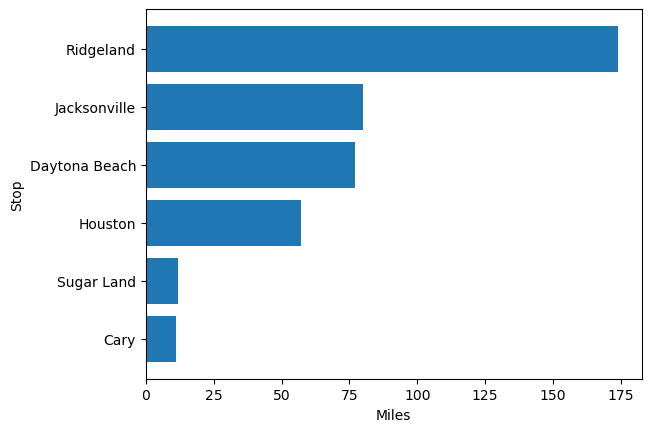

In [67]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results2["STOP"],results2["MILES"])    
plt.show()

In [79]:
results2

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
60,2016-01-30 18:09:00,2016-01-30 18:24:00,Business,Apex,Cary,5,Customer Visit,Saturday
244,2016-03-19 12:50:00,2016-03-19 13:13:00,Business,Houston,Sugar Land,12,Customer Visit,Saturday
245,2016-03-19 14:01:00,2016-03-19 14:57:00,Business,Sugar Land,Houston,35,Customer Visit,Saturday
251,2016-03-19 19:33:00,2016-03-19 20:39:00,Business,Galveston,Houston,57,Customer Visit,Saturday
295,2016-04-02 12:21:00,2016-04-02 14:47:00,Business,Kissimmee,Daytona Beach,77,Customer Visit,Saturday
296,2016-04-02 16:57:00,2016-04-02 18:09:00,Business,Daytona Beach,Jacksonville,80,Customer Visit,Saturday
297,2016-04-02 19:38:00,2016-04-02 22:36:00,Business,Jacksonville,Ridgeland,174,Customer Visit,Saturday
388,2016-05-28 14:35:00,2016-05-28 15:04:00,Business,Morrisville,Cary,11,Customer Visit,Saturday
978,2016-11-19 21:14:00,2016-11-19 21:35:00,Business,Apex,Cary,5,Customer Visit,Saturday
1019,2016-12-03 20:31:00,2016-12-03 20:41:00,Business,Morrisville,Cary,3,Customer Visit,Saturday


## Rigeland and Jacksonvile and Daytona Beach had longest distance out of all

# On Sundays For Customer Visit

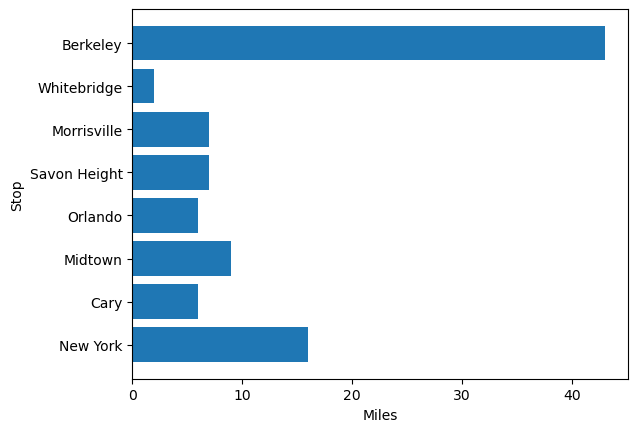

In [68]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results3["STOP"],results3["MILES"])    
plt.show()

In [78]:
results3

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16,Customer Visit,Sunday
80,2016-02-07 18:03:00,2016-02-07 18:17:00,Business,Apex,Cary,5,Customer Visit,Sunday
256,2016-03-20 18:45:00,2016-03-20 19:06:00,Business,Briar Meadow,Midtown,9,Customer Visit,Sunday
276,2016-03-27 15:31:00,2016-03-27 15:56:00,Business,Kissimmee,Orlando,6,Customer Visit,Sunday
401,2016-06-05 14:03:00,2016-06-05 14:33:00,Business,Whitebridge,Savon Height,7,Customer Visit,Sunday
402,2016-06-05 15:06:00,2016-06-05 15:22:00,Business,Cary,Morrisville,7,Customer Visit,Sunday
633,2016-08-07 17:28:00,2016-08-07 17:43:00,Business,Edgehill Farms,Whitebridge,2,Customer Visit,Sunday
850,2016-10-23 21:10:00,2016-10-23 21:25:00,Business,Morrisville,Cary,3,Customer Visit,Sunday
913,2016-11-06 16:27:00,2016-11-06 17:28:00,Business,Santa Clara,Berkeley,43,Customer Visit,Sunday
980,2016-11-20 11:58:00,2016-11-20 12:28:00,Business,Cary,Cary,6,Customer Visit,Sunday


## Berkeley and Followed By New York

## These Were the days when large distance was covered. Now Lets See Where All Uber was used when The days are having high Frequnecy.

In [70]:
results_1 = result2.loc[result2["day"]=="Friday"]
results_2 = result2.loc[result2["day"]=="Monday"]
results_3 = result2.loc[result2["day"]=="Wednesday"]

## On Fridays

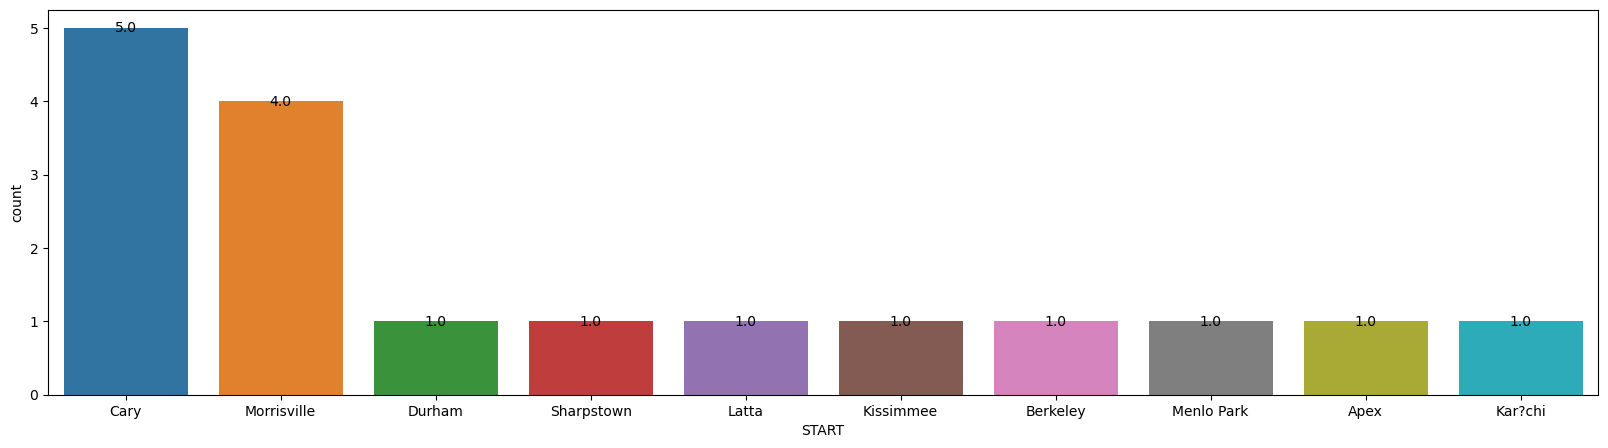

In [75]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results_1,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## Pickup on Fridays was more common and Freuqent from Cary and Morrisville

## On Mondays

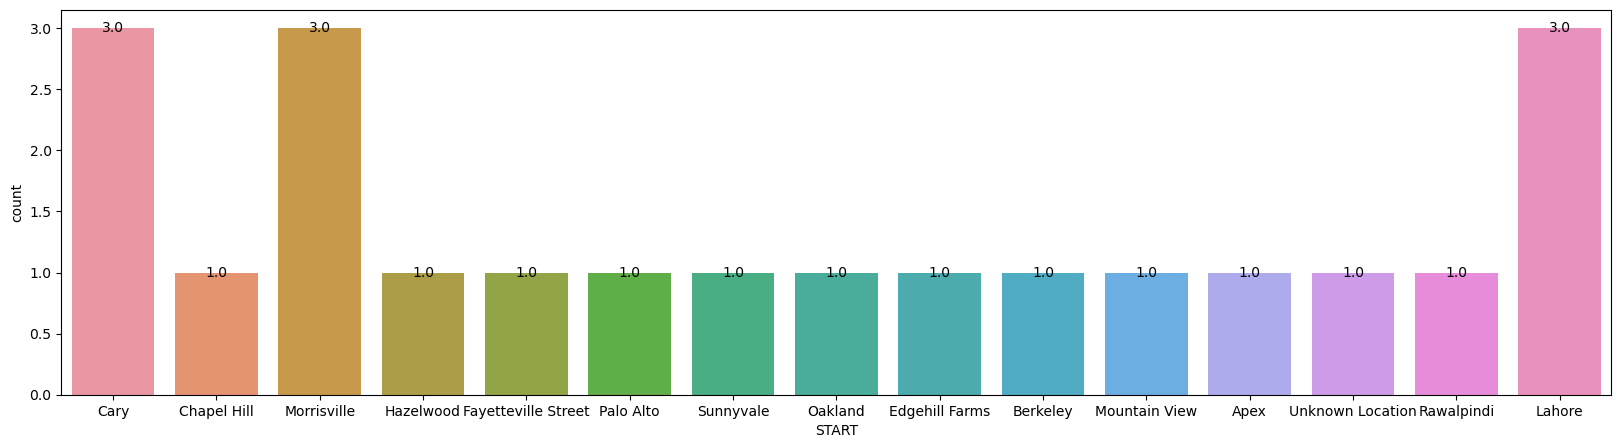

In [76]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results_2,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## Cary Morrisville and Lahore

## On Wednesdays

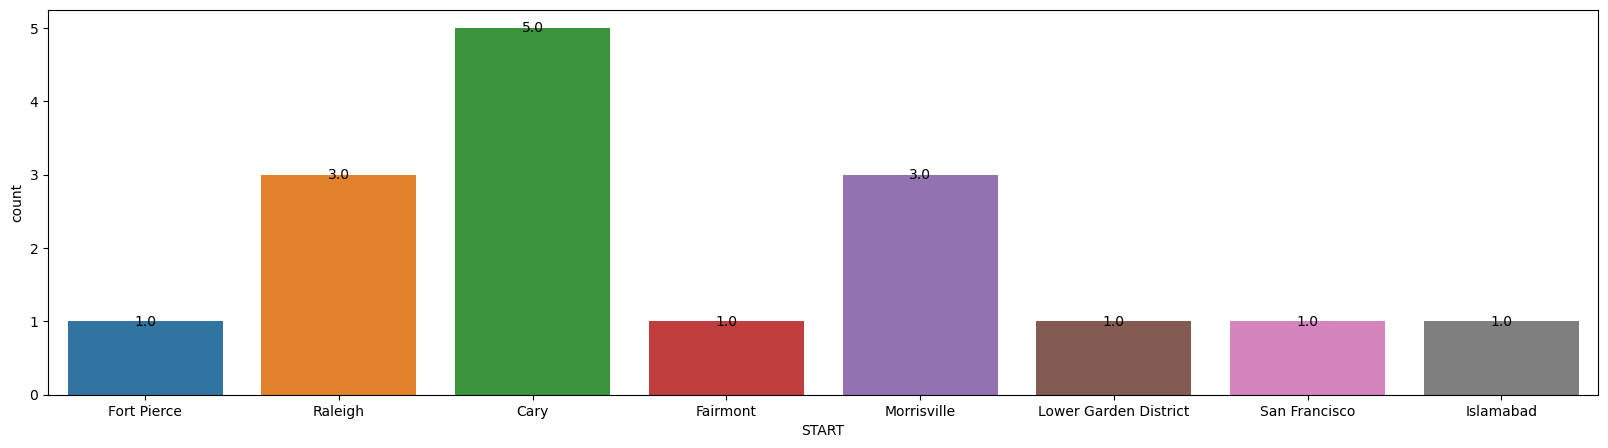

In [77]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results_3,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## Cary Morrisvile and Relegigh

# Meetings

In [40]:
result3 = df.loc[df["PURPOSE"]=="Meeting"]

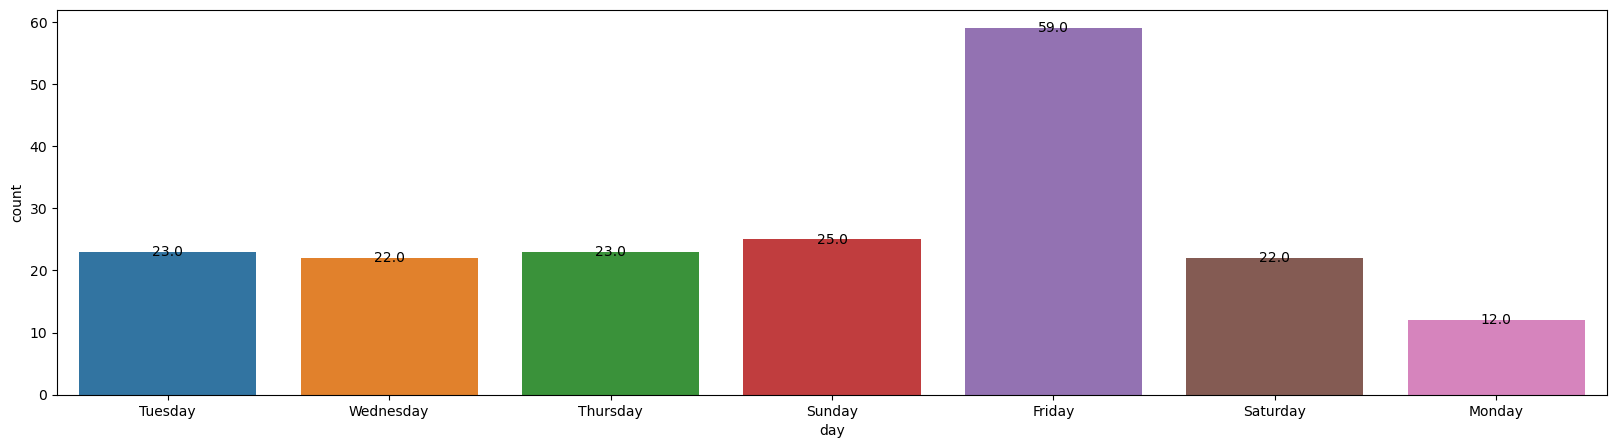

In [41]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=result3,x="day")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## For Meetings Friday was used to cover large Distance and Frequently. Sundays used Comparitively less but still covered large distance

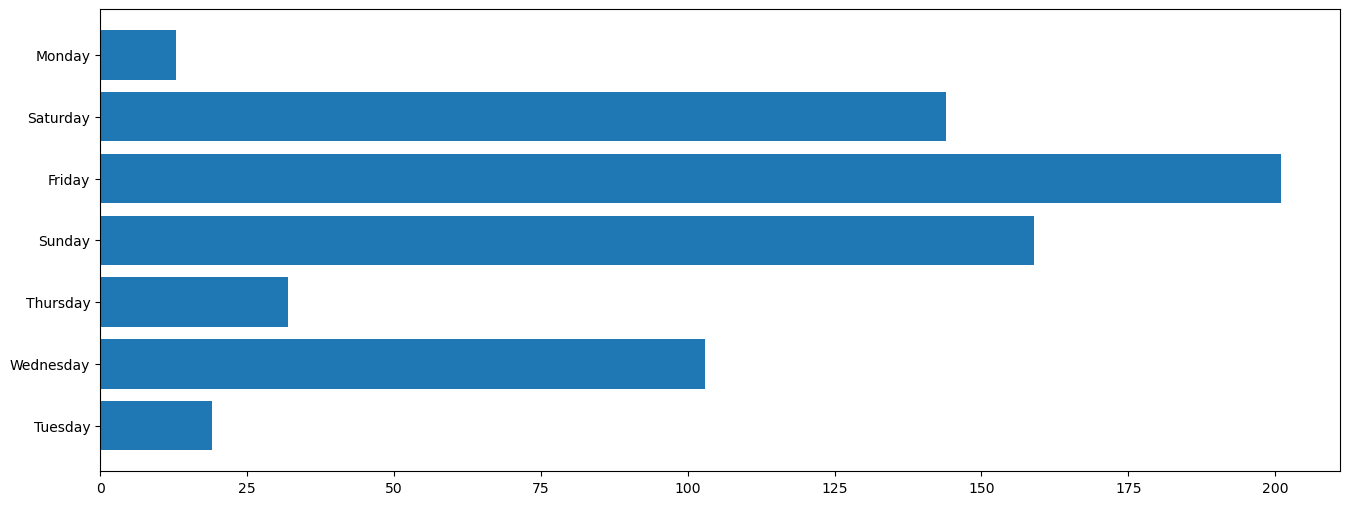

In [42]:
plt.figure(figsize=(16,6))
plt.barh(result3["day"],result3["MILES"])    
plt.show()

In [43]:
result3.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4,Meeting,Tuesday
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7,Meeting,Wednesday
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0,Meeting,Thursday
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8,Meeting,Sunday
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10,Meeting,Sunday


In [83]:
results1_ = result3.loc[result3["day"]=="Friday"]
results2_ = result3.loc[result3["day"]=="Sunday"]

In [82]:
results1_.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
54,2016-01-29 10:56:00,2016-01-29 11:07:00,Business,Cary,Cary,5,Meeting,Friday
55,2016-01-29 11:43:00,2016-01-29 12:03:00,Business,Cary,Durham,10,Meeting,Friday
56,2016-01-29 13:24:00,2016-01-29 13:47:00,Business,Durham,Cary,10,Meeting,Friday
74,2016-02-05 11:47:00,2016-02-05 12:07:00,Business,Cary,Durham,10,Meeting,Friday
75,2016-02-05 13:22:00,2016-02-05 13:41:00,Business,Durham,Cary,10,Meeting,Friday


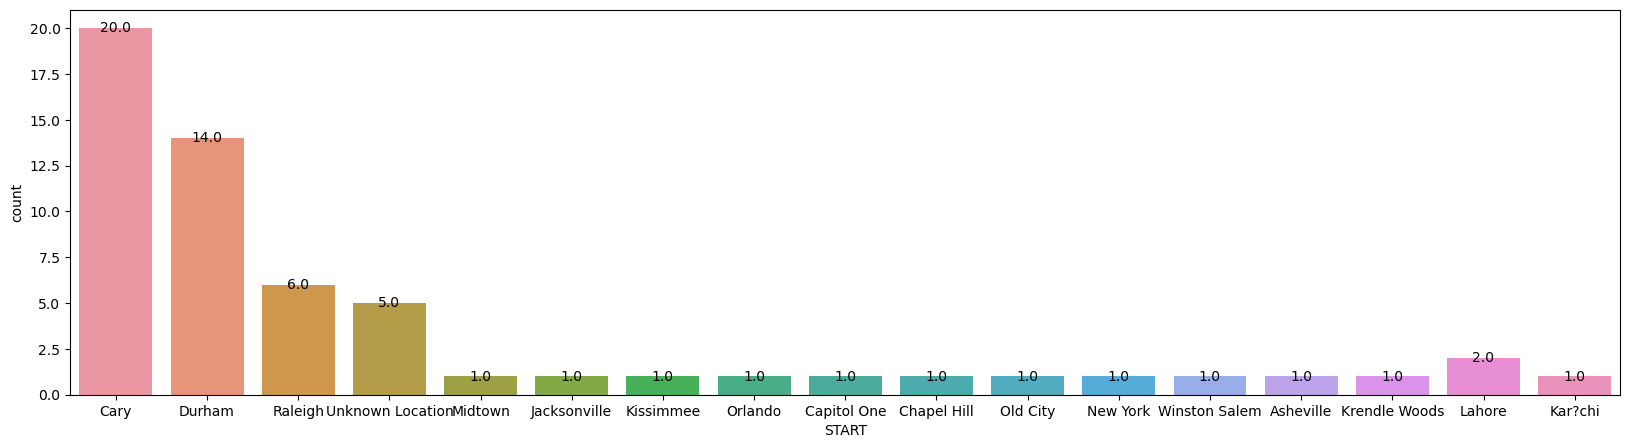

In [84]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results1_,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## Pickup was taken More From Cary Durham and Releigh

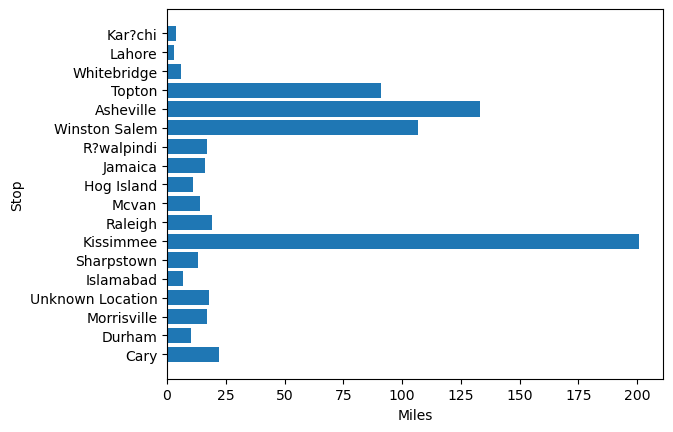

In [86]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results1_["STOP"],results1_["MILES"])    
plt.show()

## On Fridays for meetings Uber was used to visit Kissimmee, Topton and Asheville

## On Sundays For meetings

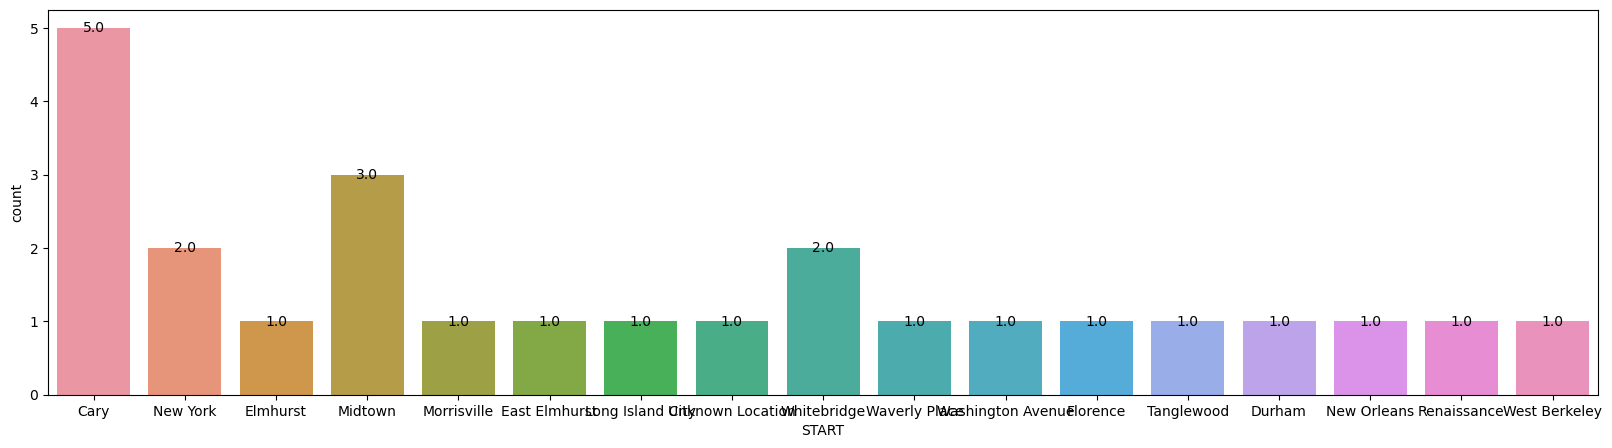

In [89]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=results2_,x="START")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

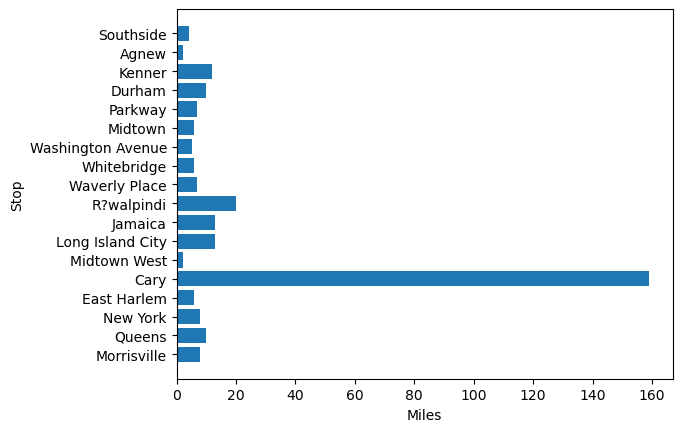

In [87]:
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(results2_["STOP"],results2_["MILES"])    
plt.show()

## Cary was the only place used for long distance

## Looking At what all purpose uber was used on Friday's

In [44]:
result4 = result.loc[result["day"]=="Friday"]

In [45]:
result4

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5,Meal/Entertain,Friday
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8,Errand/Supplies,Friday
28,2016-01-15 11:43:00,2016-01-15 12:03:00,Business,Cary,Durham,10,Meal/Entertain,Friday
29,2016-01-15 13:26:00,2016-01-15 13:44:00,Business,Durham,Cary,10,Meal/Entertain,Friday
53,2016-01-29 09:31:00,2016-01-29 09:45:00,Business,Cary,Cary,4,Customer Visit,Friday
...,...,...,...,...,...,...,...,...
1145,2016-12-30 10:15:00,2016-12-30 10:33:00,Business,Kar?chi,Kar?chi,2,Errand/Supplies,Friday
1146,2016-12-30 11:31:00,2016-12-30 11:56:00,Business,Kar?chi,Kar?chi,2,Errand/Supplies,Friday
1147,2016-12-30 15:41:00,2016-12-30 16:03:00,Business,Kar?chi,Kar?chi,4,Errand/Supplies,Friday
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4,Meeting,Friday


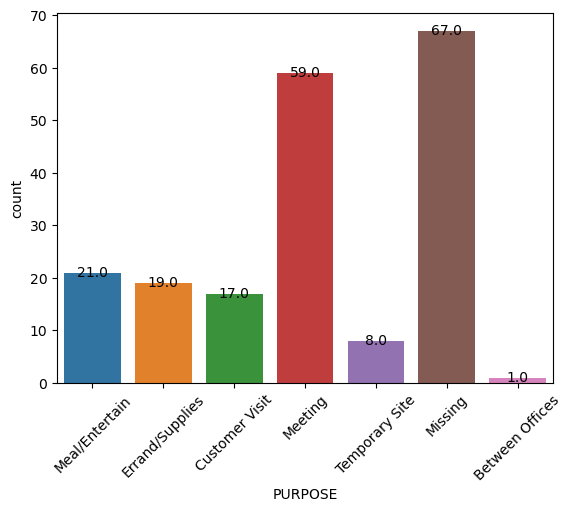

In [46]:
a = sns.countplot(data=result4,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 45)
plt.show()


## Mostly Uber Was used More for Meeting, Meals, Errand/Supplies and Customer Visit On Fridays

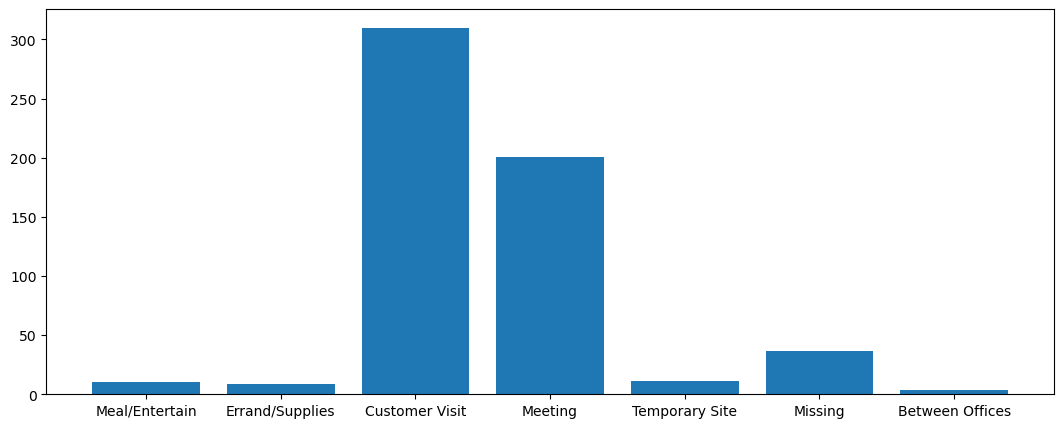

In [47]:
plt.figure(figsize=(13,5))
plt.bar(result4["PURPOSE"],result4["MILES"])    
plt.show()

## Uber Covered a larger distance for Customer Visit and Meetings

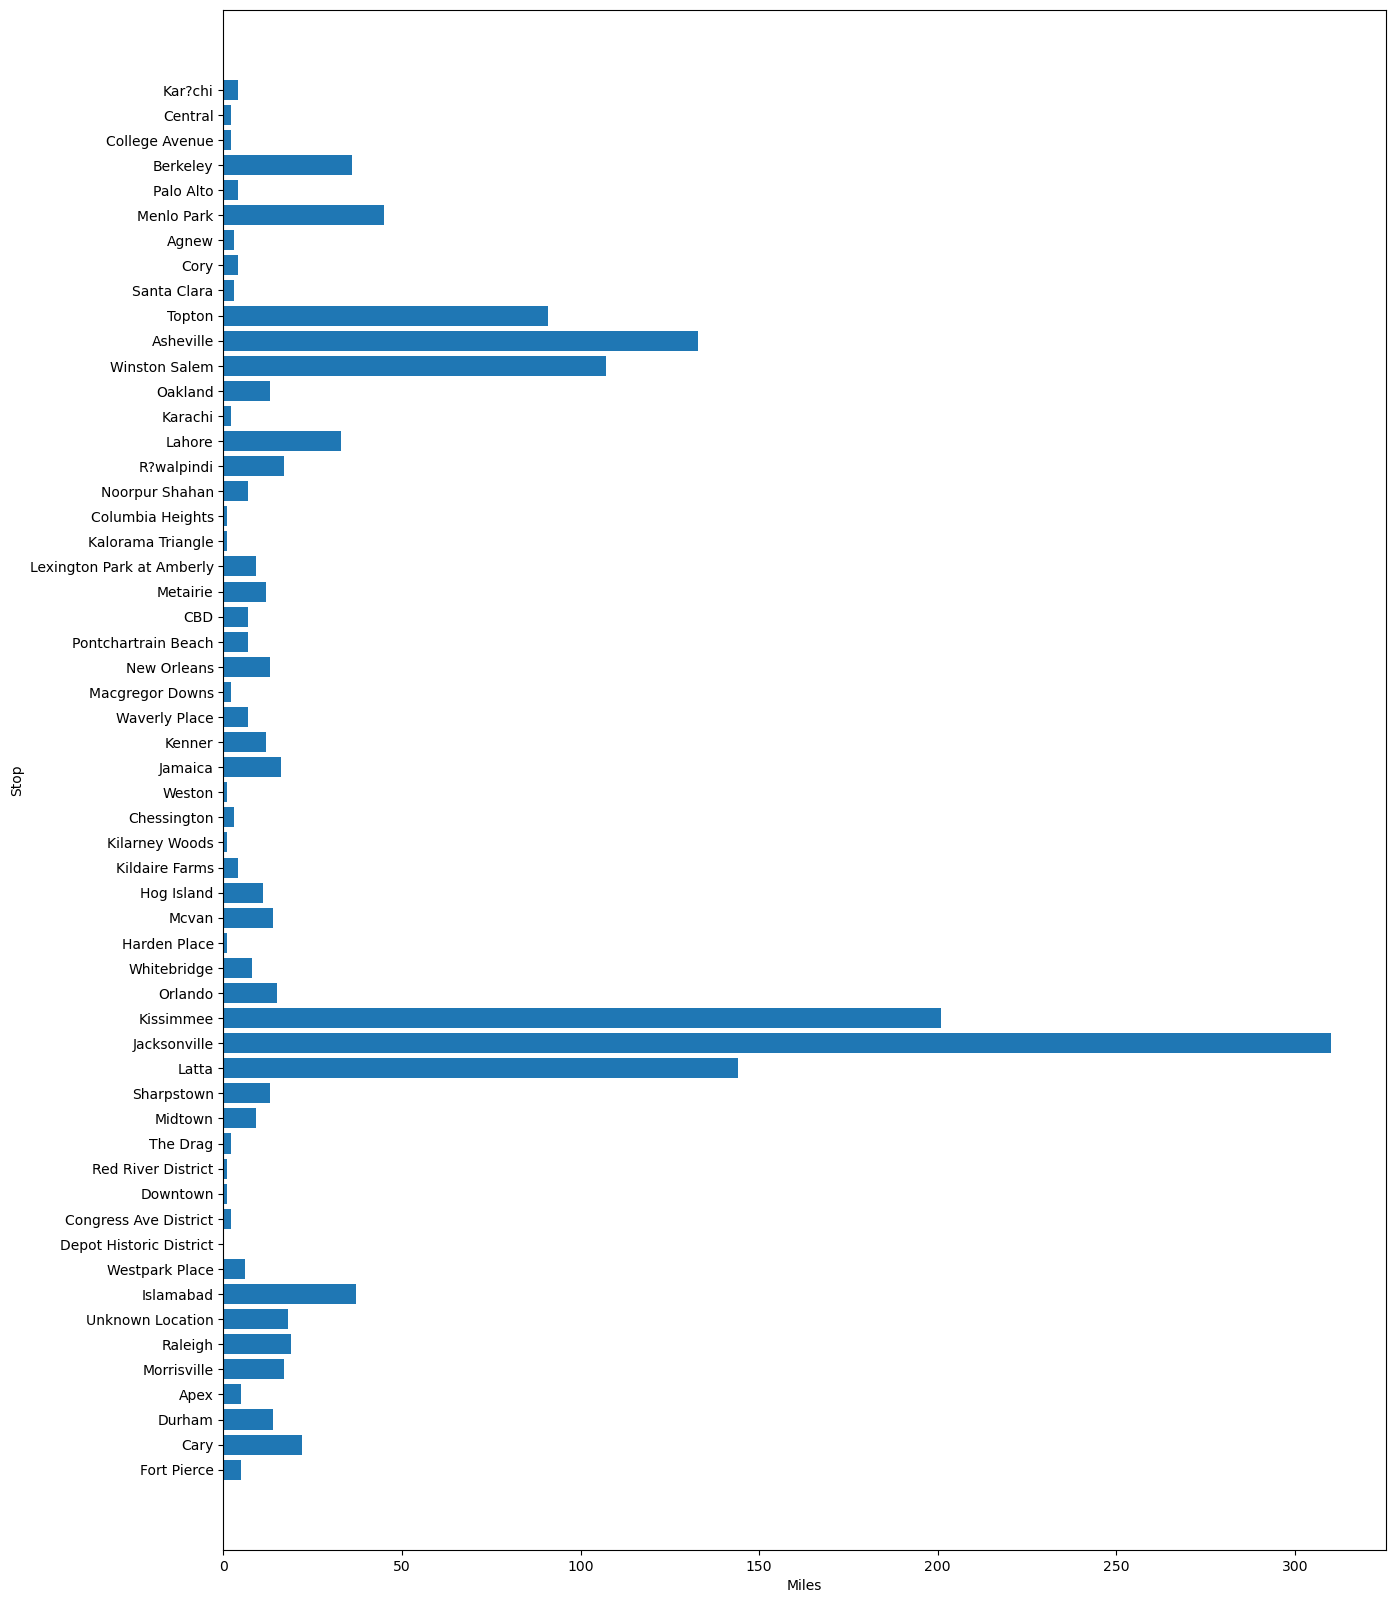

In [48]:
plt.figure(figsize=(15,20))
plt.xlabel("Miles")
plt.ylabel("Stop")
plt.barh(result4["STOP"],result4["MILES"])    
plt.show()

## Uber Was used for Visiting Kissimmee, Jacksonville and Asheville on Friday's.

In [49]:
loc1 = result4.loc[result4["STOP"]=="Kissimmee"]
loc2 = result4.loc[result4["STOP"]=="Jacksonville"]
loc3 = result4.loc[result4["STOP"]=="Asheville"]

In [50]:
loc1.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
270,2016-03-25 22:54:00,2016-03-26 01:39:00,Business,Jacksonville,Kissimmee,201,Meeting,Friday
289,2016-04-01 13:43:00,2016-04-01 14:01:00,Business,Kissimmee,Kissimmee,11,Meeting,Friday
291,2016-04-01 16:01:00,2016-04-01 16:49:00,Business,Orlando,Kissimmee,20,Meeting,Friday


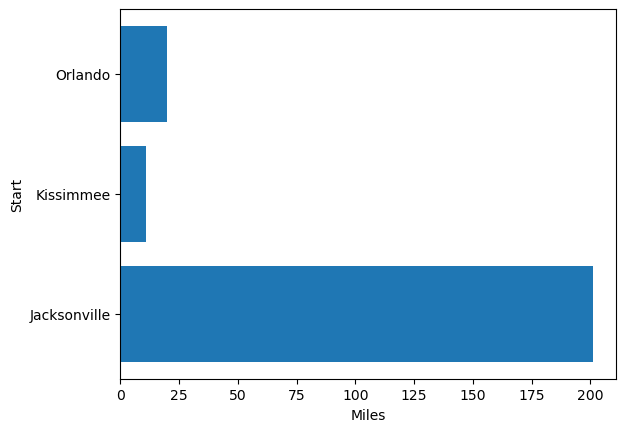

In [51]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc1["START"],loc1["MILES"])    
plt.show()

## On Friday's Uber was used to travel Kissimee Where Start location was Orlando, Kissimmee And Jacksonville. All had usecase "Meeting"

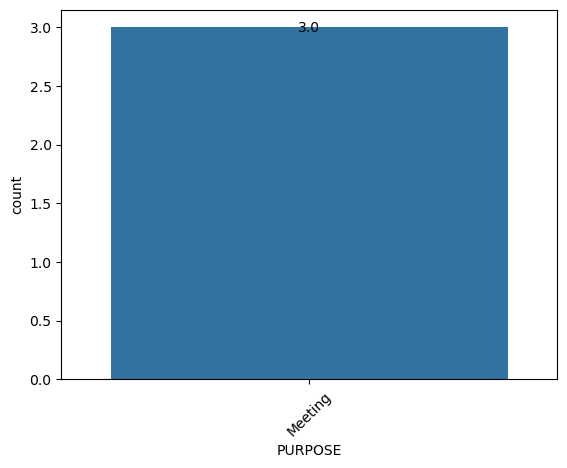

In [52]:
a = sns.countplot(data=loc1,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 45)
plt.show()


In [53]:
loc2.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
269,2016-03-25 16:52:00,2016-03-25 22:22:00,Business,Latta,Jacksonville,310,Customer Visit,Friday


In [54]:
loc3.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
870,2016-10-28 18:13:00,2016-10-28 20:07:00,Business,Winston Salem,Asheville,133,Meeting,Friday


# Data analysis on sundays

In [55]:
result5 = result.loc[result["day"]=="Sunday"]

In [56]:
result5

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8,Meeting,Sunday
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16,Customer Visit,Sunday
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10,Meeting,Sunday
11,2016-01-10 18:18:00,2016-01-10 18:53:00,Business,Elmhurst,New York,7,Meeting,Sunday
12,2016-01-10 19:12:00,2016-01-10 19:32:00,Business,Midtown,East Harlem,6,Meeting,Sunday
...,...,...,...,...,...,...,...,...
1058,2016-12-18 16:38:00,2016-12-18 17:25:00,Business,Unknown Location,Unknown Location,10,Errand/Supplies,Sunday
1059,2016-12-18 20:35:00,2016-12-18 21:04:00,Business,Unknown Location,Unknown Location,9,Missing,Sunday
1111,2016-12-25 00:10:00,2016-12-25 00:14:00,Business,Lahore,Lahore,0,Errand/Supplies,Sunday
1112,2016-12-25 19:15:00,2016-12-25 19:26:00,Business,Lahore,Lahore,2,Meal/Entertain,Sunday


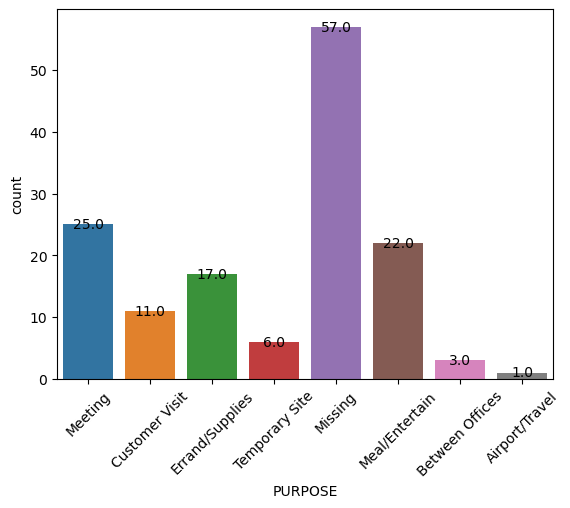

In [57]:
a = sns.countplot(data=result5,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
    plt.xticks(rotation = 45)
plt.show()

## On Sundays Uber is used for Meeting, Errand Supplies and Meal moreover

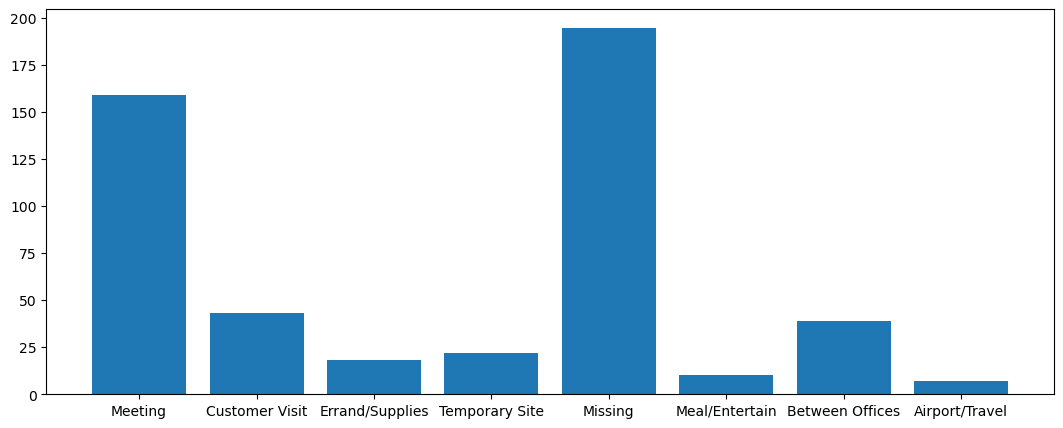

In [59]:
plt.figure(figsize=(13,5))
plt.bar(result5["PURPOSE"],result5["MILES"])    
plt.show()

## Meetings are hapening at a long distance

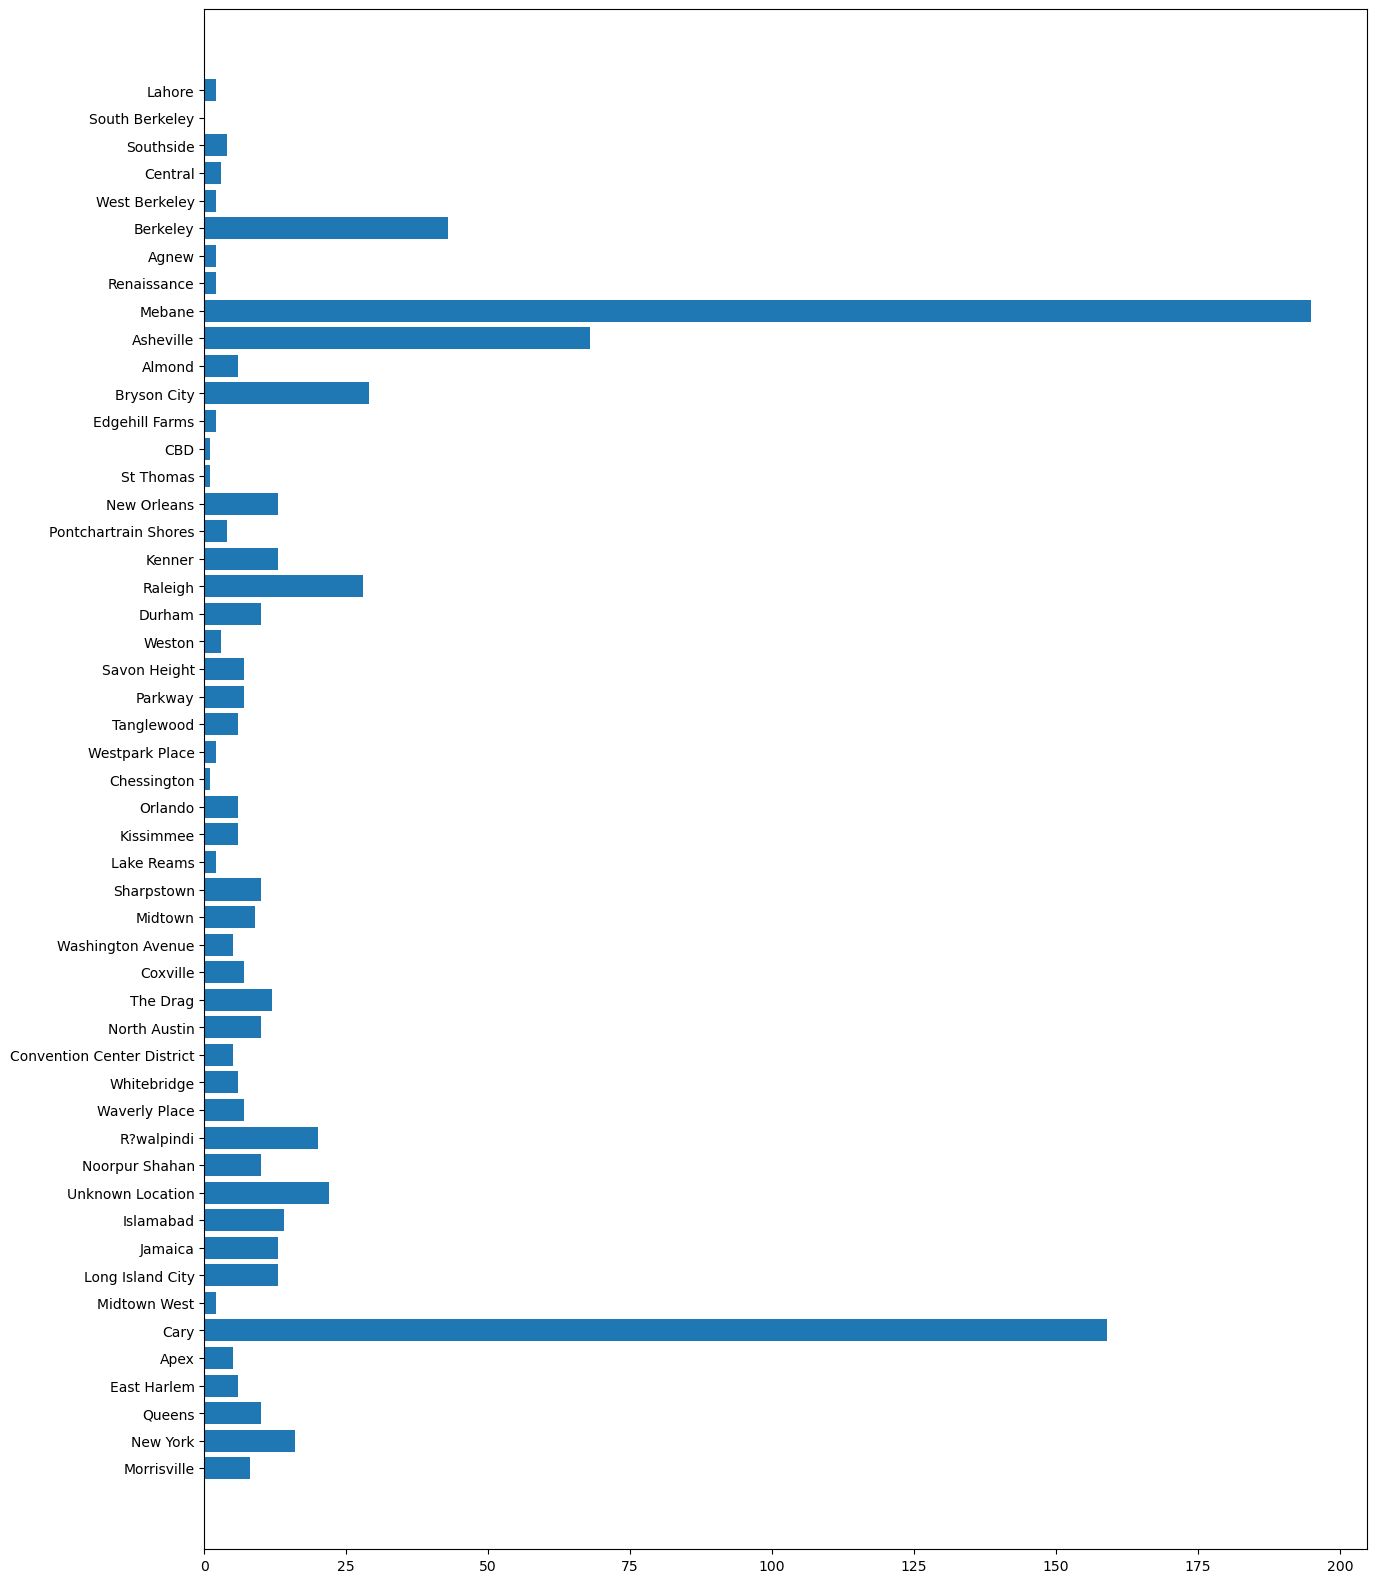

In [60]:
plt.figure(figsize=(15,20))
plt.barh(result5["STOP"],result5["MILES"])    
plt.show()

In [92]:
loc1_ = result5.loc[result5["STOP"]=="Cary"]
loc2_ = result5.loc[result5["STOP"]=="Mebane"]
loc3_ = result5.loc[result5["STOP"]=="Asheville"]

In [94]:
loc1_.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,day
80,2016-02-07 18:03:00,2016-02-07 18:17:00,Business,Apex,Cary,5,Customer Visit,Sunday
82,2016-02-07 20:22:00,2016-02-07 20:40:00,Business,Morrisville,Cary,6,Meeting,Sunday
299,2016-04-03 02:00:00,2016-04-03 04:16:00,Business,Florence,Cary,159,Meeting,Sunday
331,2016-04-24 21:41:00,2016-04-24 21:50:00,Business,Morrisville,Cary,4,Between Offices,Sunday
380,2016-05-22 18:46:00,2016-05-22 18:53:00,Business,Morrisville,Cary,2,Meal/Entertain,Sunday


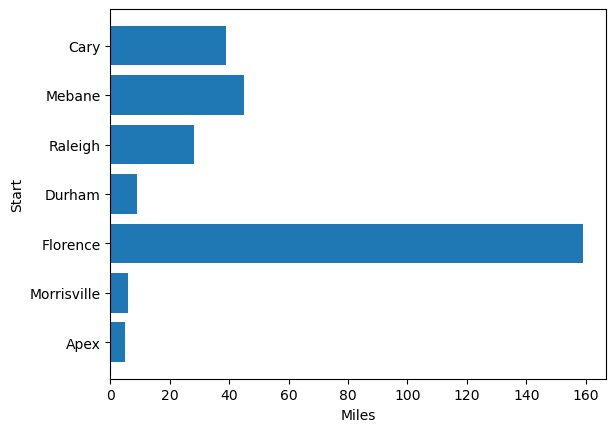

In [96]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc1_["START"],loc1_["MILES"])    
plt.show()

## Uber Was Used to Travel Cary From Florence and Mebane which had longest distance out of all

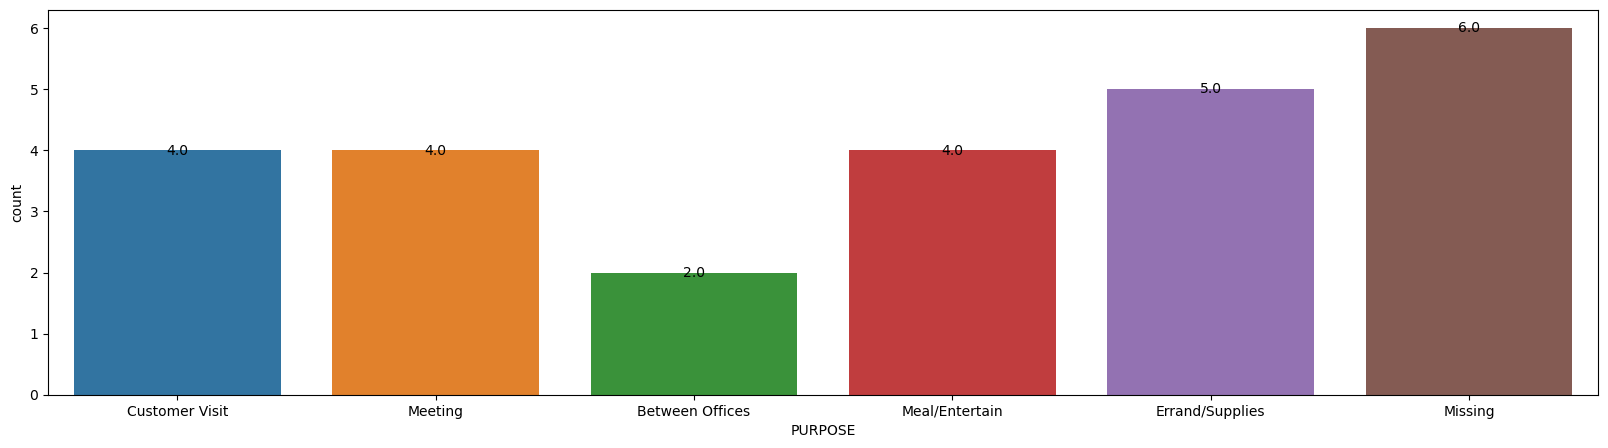

In [104]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=loc1_,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

## On Sundays Uber was used for Meeting, Customer Visit and Supplies in Cary

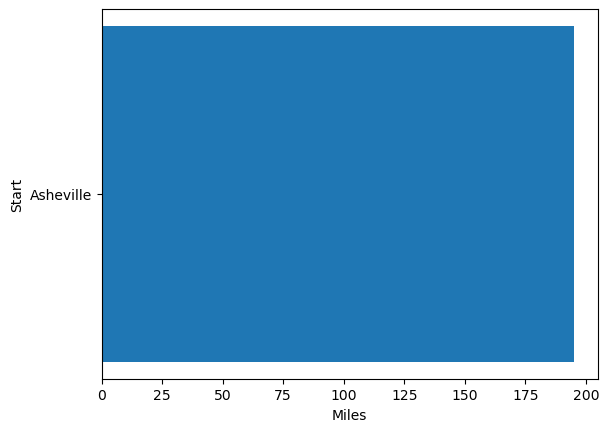

In [97]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc2_["START"],loc2_["MILES"])    
plt.show()

## Mebane Was the Drop location where Asheville was the picup location and had large distance to cover

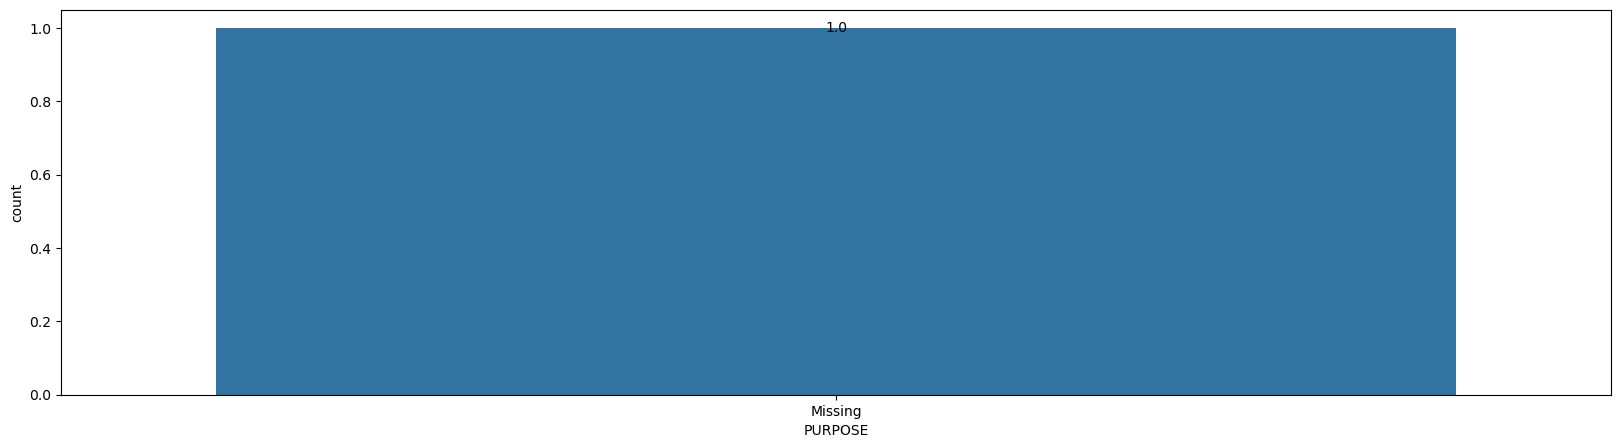

In [105]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=loc2_,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()

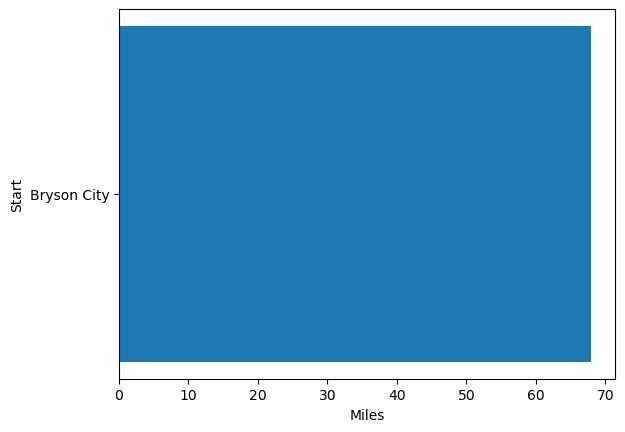

In [98]:
plt.xlabel("Miles")
plt.ylabel("Start")
plt.barh(loc3_["START"],loc3_["MILES"])    
plt.show()

## Asheville Was the Drop location where Bryson City was the pickup location 

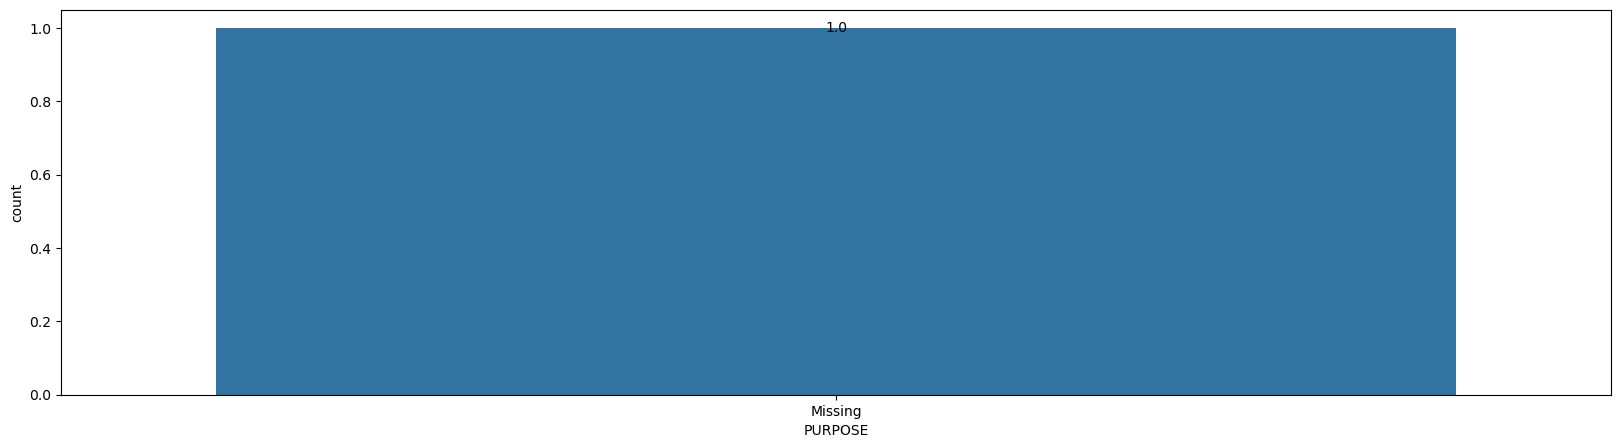

In [102]:
plt.figure(figsize=(20,5))

a = sns.countplot(data=loc3_,x="PURPOSE")
for p in a.patches:
    a.annotate(str(p.get_height()),(p.get_x() + p.get_width()/2.,p.get_height()),ha='center',va='center')
plt.show()